/tmp/ipykernel_26069/1836663169.py:24: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = opt.curve_fit(transfer_function_fit, freq, magnitude_linear, p0=init_guess)


추정된 전달 함수: H(s) = 6.283 / (s + -0.001)


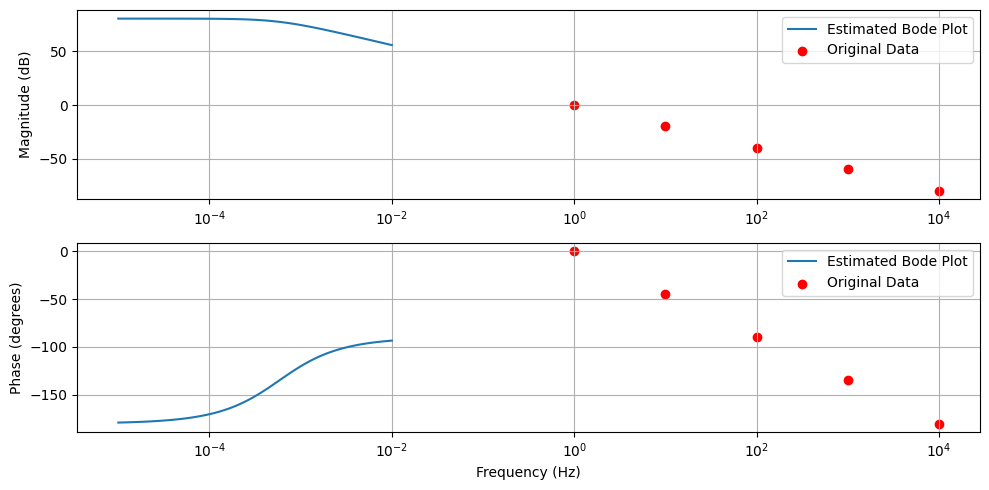

In [1]:
import numpy as np
import scipy.signal as signal
import scipy.optimize as opt
import matplotlib.pyplot as plt

# 예제 Bode plot 데이터 (주파수, 크기[dB], 위상[degree])
freq = np.array([1, 10, 100, 1000, 10000])  # 주파수(Hz)
magnitude_dB = np.array([0, -20, -40, -60, -80])  # 크기(dB)
phase_deg = np.array([0, -45, -90, -135, -180])  # 위상(degree)

# 크기를 선형 스케일로 변환
magnitude_linear = 10**(magnitude_dB / 20)

# 목표: 전달 함수 H(s) = K / (s + a) 형태로 피팅
def transfer_function_fit(freq, K, a):
    s = 1j * 2 * np.pi * freq
    H_s = K / (s + a)
    return np.abs(H_s)

# 초기 추정값 (K, a)
init_guess = [1, 10]

# 최적화: magnitude 데이터를 기반으로 K, a 추정
params, _ = opt.curve_fit(transfer_function_fit, freq, magnitude_linear, p0=init_guess)

# 최적화된 K, a 값 출력
K_opt, a_opt = params
print(f"추정된 전달 함수: H(s) = {K_opt:.3f} / (s + {a_opt:.3f})")

# 최적의 전달 함수 생성  
num = [K_opt]
den = [1, a_opt]
system = signal.TransferFunction(num, den)

# Bode plot 생성 및 원본 데이터와 비교
w, mag, phase = signal.bode(system)

plt.figure(figsize=(10, 5))

# Magnitude plot
plt.subplot(2, 1, 1)
plt.semilogx(w, mag, label="Estimated Bode Plot")
plt.scatter(freq, magnitude_dB, color="red", label="Original Data")
plt.ylabel("Magnitude (dB)")
plt.legend()
plt.grid()

# Phase plot
plt.subplot(2, 1, 2)
plt.semilogx(w, phase, label="Estimated Bode Plot")
plt.scatter(freq, phase_deg, color="red", label="Original Data")
plt.ylabel("Phase (degrees)")
plt.xlabel("Frequency (Hz)")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


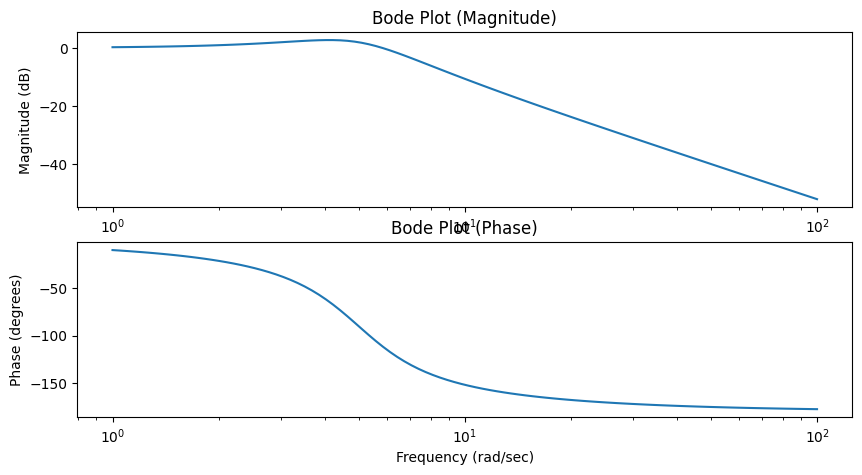

In [2]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# 전달 함수 정의
num = [25]           # 분자 계수
den = [1, 4, 25]     # 분모 계수 (s^2 + 4s + 25)

# 전달 함수 생성
H = signal.TransferFunction(num, den)

# 보드 선도 계산
w, mag, phase = signal.bode(H)

# Magnitude Plot
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.semilogx(w, mag)  # 주파수 축 로그 스케일
plt.title('Bode Plot (Magnitude)')
plt.ylabel('Magnitude (dB)')

# Phase Plot
plt.subplot(2,1,2)
plt.semilogx(w, phase)  # 주파수 축 로그 스케일
plt.title('Bode Plot (Phase)')
plt.ylabel('Phase (degrees)')
plt.xlabel('Frequency (rad/sec)')

plt.show()